In [208]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
import warnings
warnings.filterwarnings("ignore")

In [210]:
import sqlite3
import pandas as pd
import numpy as np
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from statsmodels.graphics.tsaplots import plot_acf
from hvPred import HVmodel

In [211]:
con = sqlite3.connect('stock_data.db', check_same_thread=False)

In [212]:
finance = [
    "JPM",  # JPMorgan Chase
    "BAC",  # Bank of America
    "C",    # Citigroup
    "GS",   # Goldman Sachs
    "MS",   # Morgan Stanley
    "AXP",  # American Express
    "WFC",  # Wells Fargo
    "USB",  # U.S. Bancorp
    "PNC",  # PNC Financial Services
    "SCHW"  # Charles Schwab
]

tech = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "NVDA",  # Nvidia
    "GOOGL", # Alphabet (Google)
    "AMD",   # Advanced Micro Devices
    "INTC",  # Intel
    "TSLA",  # Tesla (tech-adjacent)
    "CRM",   # Salesforce
    "ORCL",  # Oracle
    "AVGO"   # Broadcom
]

crypto = [
    "BTC",  # Bitcoin
    "ETH",  # Ethereum
    "LTC",  # Litecoin
    "SOL",  # Solana
    "XRP",  # Ripple
    "ADA",  # Cardano
    "BNB",  # Binance Coin
    "DOGE", # Dogecoin
    "AVAX", # Avalanche
    "DOT"   # Polkadot
]

etf = [
    "SPY",   # S&P 500 ETF
    "QQQ",   # Nasdaq 100 ETF
    "IWM",   # Russell 2000 ETF
    "VXX",   # Volatility ETF
    "XLK",   # Technology Sector ETF
    "XLF",   # Financial Sector ETF
    "ARKK",  # ARK Innovation ETF
    "DIA",   # Dow Jones ETF
    "EEM",   # Emerging Markets ETF
    "TLT"    # 20+ Year Treasury Bond ETF
]


In [213]:
all_stocks = finance + tech + crypto + etf

In [214]:
for st in all_stocks:
    dt = stock_data(st)
    dt.get_daily('full')
    dt.insert_table(con, if_exists='replace')

    

Data for JPM inserted into database
Data for BAC inserted into database
Data for C inserted into database
Data for GS inserted into database
Data for MS inserted into database
Data for AXP inserted into database
Data for WFC inserted into database
Data for USB inserted into database
Data for PNC inserted into database
Data for SCHW inserted into database
Data for AAPL inserted into database
Data for MSFT inserted into database
Data for NVDA inserted into database
Data for GOOGL inserted into database
Data for AMD inserted into database
Data for INTC inserted into database
Data for TSLA inserted into database
Data for CRM inserted into database
Data for ORCL inserted into database
Data for AVGO inserted into database
Data for BTC inserted into database
Data for ETH inserted into database
Data for LTC inserted into database
Data for SOL inserted into database
{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME

In [224]:
dt=stock_data('ADA')

In [225]:
dt.get_daily('full')

{'Information': 'We have detected your API key as YV04LNOO150FFVJZ and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


In [221]:
stock_list=list(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)['name'])
stock_list.sort()
'ADA' in stock_list

False

In [228]:
len(stock_list)

34

In [227]:
[st in stock_list for st in etf]

[True, True, False, False, False, False, False, False, False, False]

In [173]:
res={}

In [174]:
for st in all_stocks:
    dt = stock_data(st)
    df = dt.load_data(con)
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df.sort_index(inplace=True)
    df['returns'] = np.log(df['close'] / df['close'].shift(1))*100
    df.dropna(inplace=True)

    ct = clusteringTest(df['returns'])
    score = ct.clusteringScore()

    garch = GARCHWalkForward(df)
    pred, params, resids = garch.fit_garch()
    mae_garch, mse_garch, rmse_garch, qlike_garch = garch.evaluate_model(pred)

    hv = HVmodel(df)
    hv_pred = hv.HVpred()
    mae_hv, mse_hv, rmse_hv, qlike_hv = hv.evaluate_model(hv_pred)

    res[st] = [len(df), score, mae_hv, mae_garch, mse_hv, mse_garch, rmse_hv, rmse_garch, qlike_hv, qlike_garch]
    print(f"Done with {st}")

    
    

Done with JPM
Done with BAC
Done with GS


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with NVDA
Done with AAPL
Done with AMD


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with MSTR
Done with RIOT
Done with COIN
Done with SPY
Done with QQQ


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projec

Done with VTI


/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/Documents/job_prep/projects/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [175]:
df_res=pd.DataFrame.from_dict(res, orient='index', columns=['Observations','Clustering Score','MAE (HV)','MAE (GARCH)','MSE (HV)','MSE (GARCH)','RMSE (HV)','RMSE (GARCH)','QLIKE (HV)','QLIKE (GARCH)'])

In [177]:
df_res.sort_values(by='Clustering Score',ascending=False, inplace=True)

In [178]:
df_res

,Observations,Clustering Score,MAE (HV),MAE (GARCH),MSE (HV),MSE (GARCH),RMSE (HV),RMSE (GARCH),QLIKE (HV),QLIKE (GARCH)
SPY,6458,1.528,0.431719,0.417018,0.338760,0.285305,0.582031,0.534139,0.670078,0.623520
GS,6458,1.069,0.647400,0.665590,0.744564,0.687146,0.862881,0.828943,1.854593,1.832631
COIN,1062,0.706,2.236843,2.261725,7.281576,6.795894,2.698440,2.606893,3.996920,3.959935
JPM,6458,0.697,0.604549,0.646968,0.675364,0.689623,0.821805,0.830435,1.632442,1.613048
BAC,6458,0.391,0.678893,0.904485,0.807244,1.045217,0.898468,1.022358,1.899134,2.000032
AMD,6458,0.115,1.144420,1.314756,2.092986,2.305543,1.446715,1.518401,2.982725,3.032500
QQQ,6457,0.034,0.537311,0.557618,0.498733,0.491822,0.706210,0.701300,1.235093,1.232524
VTI,6059,0.010,0.434435,0.543770,0.338272,0.414974,0.581611,0.644185,0.663789,0.769018
RIOT,5647,0.009,2.027164,3.330528,6.545666,13.592284,2.558450,3.686771,4.443361,4.656024
MSTR,6458,0.007,2.796191,3.312566,39.505169,36.055388,6.285314,6.004614,4.076200,4.158174


In [ ]:
delta_QLIKE = {}
for st in all_stocks:
    delta_QLIKE[st] =[df_res.loc[st,'Clustering Score'], (df_res.loc[st, 'QLIKE (HV)'] - df_res.loc[st, 'QLIKE (GARCH)'])/ df_res.loc[st, 'QLIKE (HV)']]

In [192]:
df_res = pd.DataFrame.from_dict(delta_QLIKE, orient='index', columns=['Clustering Score','delta QLIKE'])

In [194]:
df_res.sort_values(by='Clustering Score', ascending=False, inplace=True)

In [195]:
df_res

,Clustering Score,delta QLIKE
SPY,1.528,0.069480
GS,1.069,0.011842
COIN,0.706,0.009253
JPM,0.697,0.011880
BAC,0.391,-0.053128
AMD,0.115,-0.016688
QQQ,0.034,0.002080
VTI,0.010,-0.158529
RIOT,0.009,-0.047861
MSTR,0.007,-0.020110


<Axes: title={'center': 'Clustering Score vs Delta QLIKE'}, xlabel='Clustering Score', ylabel='delta QLIKE'>

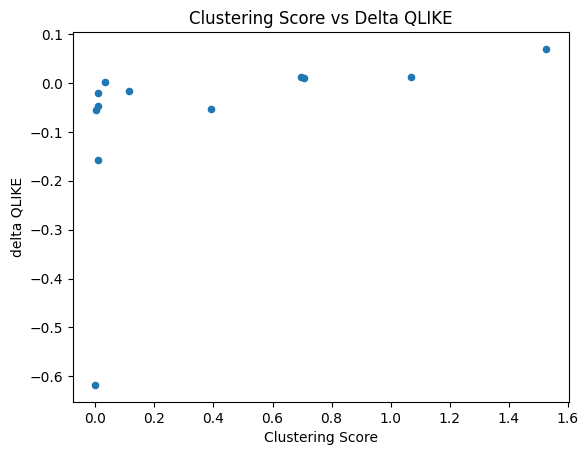

In [200]:
df_res.plot(kind='scatter', x='Clustering Score', y='delta QLIKE', title='Clustering Score vs Delta QLIKE')

In [182]:
df_finance = df_res.loc[finance].sort_values(by='Clustering Score', ascending=False)

In [183]:
df_finance

,Observations,Clustering Score,MAE (HV),MAE (GARCH),MSE (HV),MSE (GARCH),RMSE (HV),RMSE (GARCH),QLIKE (HV),QLIKE (GARCH)
GS,6458,1.069,0.647400,0.665590,0.744564,0.687146,0.862881,0.828943,1.854593,1.832631
JPM,6458,0.697,0.604549,0.646968,0.675364,0.689623,0.821805,0.830435,1.632442,1.613048
BAC,6458,0.391,0.678893,0.904485,0.807244,1.045217,0.898468,1.022358,1.899134,2.000032
